In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer # steeming.bag of words
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from nltk.corpus import stopwords
#!pip install wordcloud
nltk.download('stopwords')
from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhavesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
df1 = pd.read_csv(r'C:\Users\Bhavesh\Downloads\archive(2)\Fake.csv')
df1.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df2 = pd.read_csv(r'C:\Users\Bhavesh\Downloads\archive(2)\True.csv')
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
print(df1.shape)
print(df2.shape)

(23481, 4)
(21417, 4)


In [13]:
df1["news_class"], df2["news_class"] = 1, 0
news = pd.concat([df1,df2])
news.head()

,title,text,subject,date,news_class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [14]:
news.shape

(44898, 5)

In [15]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   news_class  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [17]:
news.isnull().sum()

title         0
text          0
subject       0
date          0
news_class    0
dtype: int64

In [18]:
news.duplicated().sum()

209

In [20]:
news.drop_duplicates(inplace=True)

In [21]:
news.duplicated().sum()

0

In [23]:
news['news_class'] = news['news_class'].astype(str)

In [24]:
news.dtypes

title         object
text          object
subject       object
date          object
news_class    object
dtype: object

# Data Visualization

In [25]:
def create_distribution(feature):
    return sns.countplot(news[feature])

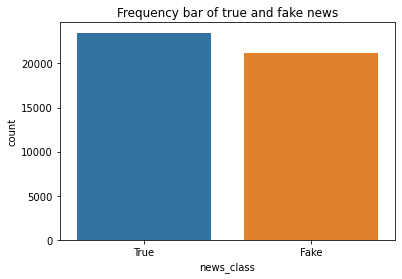

In [35]:
create_distribution('news_class')
plt.title('Frequency bar of true and fake news')
plt.xticks([0,1],["True", "Fake"])
plt.xlabel("news_class")
plt.ylabel("count")
plt.show()

In [39]:
order_sub = news.sort_values(by='subject', ascending=False).head(10)
order_sub

,title,text,subject,date,news_class
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0
14721,France's Macron says not offering Hariri exile,"BONN, Germany (Reuters) - President Emmanuel M...",worldnews,"November 15, 2017",0
14728,Gunmen shoot dead police officer and family in...,ISLAMABAD (Reuters) - Gunmen on a motorcycle s...,worldnews,"November 15, 2017",0
14727,Memories in milk bottles: Polish exhibition 's...,WARSAW (Reuters) - A deeply moving exhibition ...,worldnews,"November 15, 2017",0
14726,Zimbabweans in South Africa hope for change at...,JOHANNESBURG (Reuters) - Zimbabweans living in...,worldnews,"November 15, 2017",0
14725,Sweden says Congo not helping investigation in...,STOCKHOLM (Reuters) - Swedish prosecutors accu...,worldnews,"November 15, 2017",0
14724,Britain's May sees off challenges to Brexit pl...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"November 14, 2017",0
14723,Eyes on the 'Crocodile' as Zimbabwe military s...,HARARE (Reuters) - When Zimbabwean leader Robe...,worldnews,"November 15, 2017",0
14722,At least 15 dead in flash floods on Greek coast,"MANDRA, Greece (Reuters) - Flash floods killed...",worldnews,"November 15, 2017",0
14720,"Head of Afghan election body sacked, raising d...",KABUL (Reuters) - Afghan President Ashraf Ghan...,worldnews,"November 15, 2017",0


Text(0.5, 1.0, 'Class frequency of dataset')

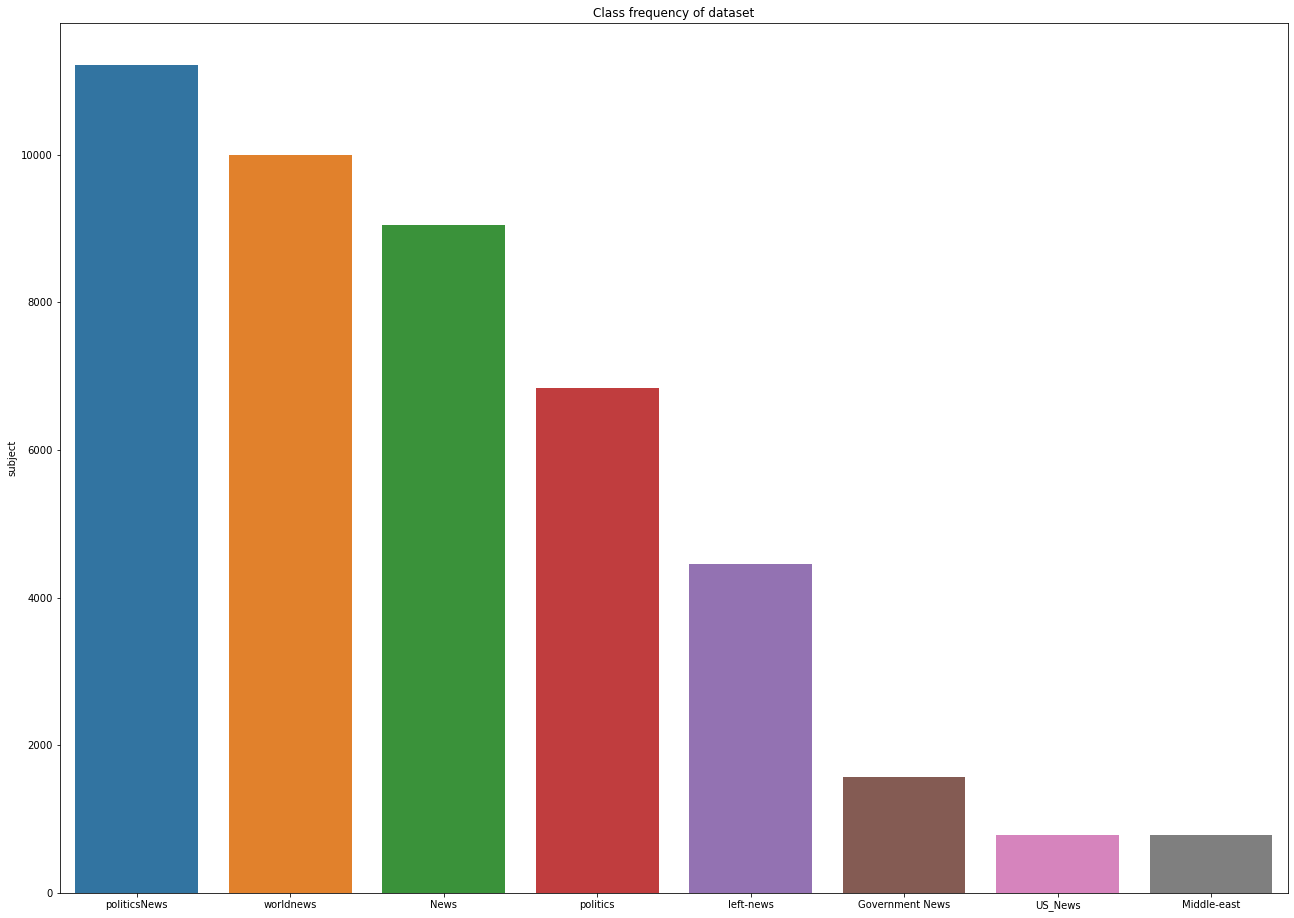

In [49]:
plt.figure(figsize=[22,16])
sns.barplot(x = news["subject"].value_counts().index,
            y = news["subject"].value_counts())
plt.title('Class frequency of dataset')

In [53]:
news.head()

,title,text,subject,date,news_class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [54]:
text = str(" ".join(news.text))

# wordcloud

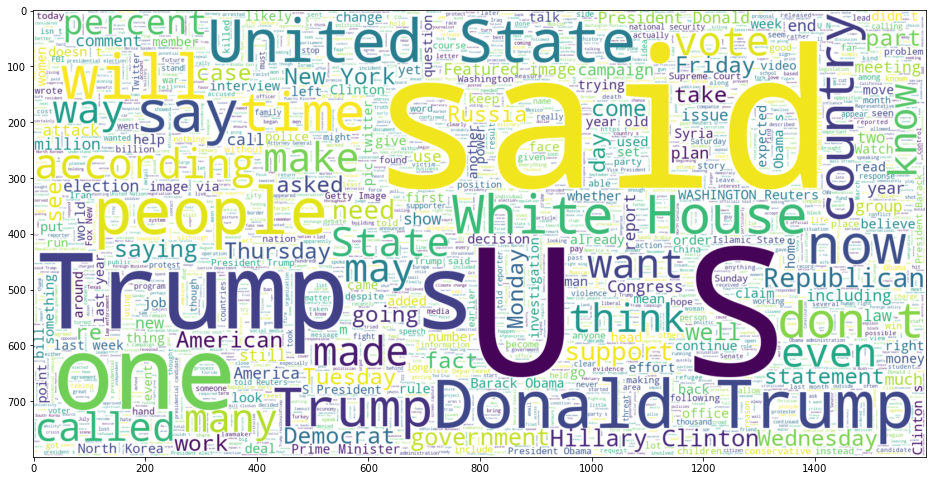

In [58]:
plt.figure(figsize = (16,12))
wc = WordCloud(min_font_size = 3, max_words = 3000,width = 1600, height = 800,background_color='white').generate(text)
plt.imshow(wc,interpolation='bilinear')

# Appling steeming on split data

In [59]:
ps = PorterStemmer()

In [60]:
messages = news.copy()

In [61]:
messages.reset_index(inplace=True)

In [62]:
messages.head()

,index,title,text,subject,date,news_class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [64]:
messages.drop(['index'],axis=1,inplace=True)

In [65]:
messages.head()

,title,text,subject,date,news_class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [69]:
corpus= []
sentences = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
  review=review.lower()
  list=review.split()
  review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
  sentences=' '.join(review)
  corpus.append(sentences)

In [70]:
corpus[0]

'donald trump send embarrass new year eve messag disturb'

In [71]:
corpus

['donald trump send embarrass new year eve messag disturb',
 'drunk brag trump staffer start russian collus investig',
 'sheriff david clark becom internet joke threaten poke peopl eye',
 'trump obsess even obama name code websit imag',
 'pope franci call donald trump christma speech',
 'racist alabama cop brutal black boy handcuff graphic imag',
 'fresh golf cours trump lash fbi deputi director jame comey',
 'trump said insan racist stuff insid oval offic wit back',
 'former cia director slam trump un bulli openli suggest act like dictat tweet',
 'watch brand new pro trump ad featur much kiss make sick',
 'papa john founder retir figur racism bad busi',
 'watch paul ryan told us care struggl famili live blue state',
 'bad news trump mitch mcconnel say repeal obamacar',
 'watch lindsey graham trash media portray trump kooki forget word',
 'heiress disney empir know gop scam us shred tax bill',
 'tone deaf trump congrat rep scalis lose weight almost die',
 'internet brutal mock disney n

In [93]:
print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [94]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [95]:
def preprocess(raw_text):
    letters_only_text = re.sub("[^a-zA-Z]"," ", raw_text)
    
    words = letters_only_text.lower().split()
    
    cleaned_words = []
    lemmatizer = PorterStemmer()
    
    
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
            

    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)
        stemmed_words.append(word)
        
        
        
    return " ".join(stemmed_words)

In [96]:
messages['prep'] = messages['text'].apply(preprocess)

In [97]:
messages.head()

,title,text,subject,date,news_class,prep
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,donald trump wish american happi new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,hous intellig committe chairman devin nune go ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,friday reveal former milwauke sheriff david cl...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,christma day donald trump announc would back w...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,pope franci use annual christma day messag reb...


In [101]:
# most common words
from collections import Counter
Counter(" ".join(messages['prep']).split()).most_common(30)

[('trump', 134291),
 ('said', 131629),
 ('state', 62946),
 ('presid', 60198),
 ('would', 54814),
 ('u', 54019),
 ('peopl', 41836),
 ('year', 41430),
 ('republican', 39634),
 ('one', 39047),
 ('say', 36650),
 ('elect', 31486),
 ('new', 31178),
 ('also', 31174),
 ('govern', 30581),
 ('like', 30116),
 ('hous', 29558),
 ('time', 29474),
 ('clinton', 29376),
 ('report', 29362),
 ('reuter', 29137),
 ('democrat', 28508),
 ('obama', 28412),
 ('donald', 28173),
 ('nation', 27769),
 ('call', 26309),
 ('support', 25713),
 ('american', 25614),
 ('countri', 25425),
 ('unit', 25028)]

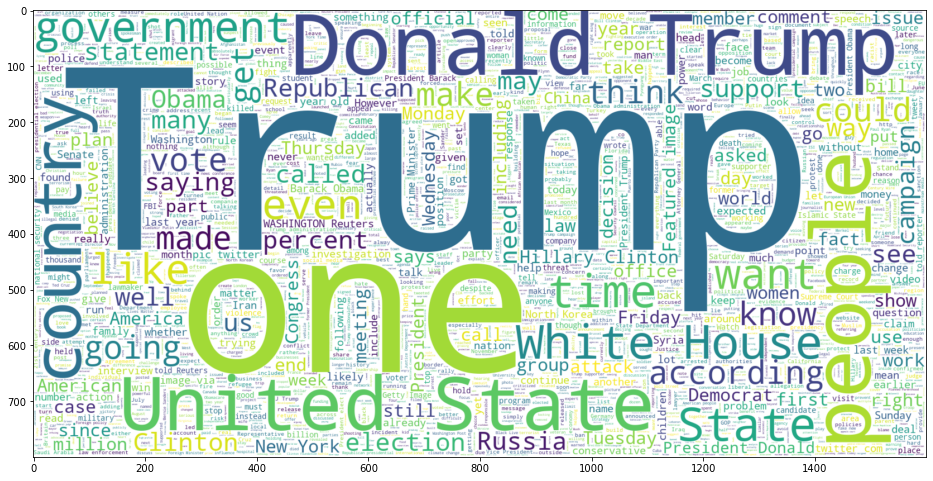

In [102]:
stopwords = stop_words
stopwords.update(['said','would','u','say','also'])
plt.figure(figsize = (16,12))
wc = WordCloud(min_font_size = 3, max_words = 3000,width = 1600, height = 800,stopwords = stopwords,background_color='white').generate(text)
plt.imshow(wc,interpolation='bilinear')

# Vectorising str datatype

In [103]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [104]:
X = cv.fit_transform(corpus).toarray()

In [105]:
X.shape

(44689, 5000)

In [106]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
cv.get_feature_names()[:20]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abort law',
 'abroad',
 'abruptli',
 'absolut',
 'absurd',
 'abus',
 'academ',
 'accept',
 'access',
 'accid']

In [108]:
messages.columns

Index(['title', 'text', 'subject', 'date', 'news_class', 'prep'], dtype='object')

In [109]:
#dependent variable
y = messages['news_class']

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [111]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [112]:
X_test.shape

(11173, 5000)

In [113]:
classifier = MultinomialNB()

In [114]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [115]:
predict = classifier.predict(X_test)
predict

array(['1', '0', '0', ..., '1', '1', '1'], dtype='<U1')

In [116]:
metrics.accuracy_score(y_test,predict)

0.9326053879889018

In [117]:
cm = metrics.confusion_matrix(y_test,predict)
cm

array([[4839,  391],
       [ 362, 5581]], dtype=int64)

In [119]:
def plot_confusion_matrix(cm):
  plt.imshow(cm,interpolation='nearest',cmap = plt.cm.Blues)
  plt.colorbar()
  plt.title('Confusion Matrix')
  labels = ['positive','negative']
  tick_marks=np.arange(len(labels))
  plt.xticks(tick_marks,labels)
  plt.yticks(tick_marks,labels)

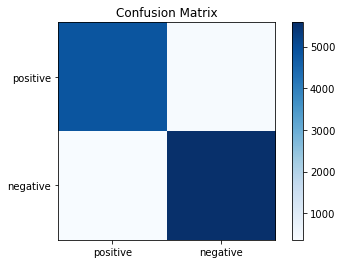

In [120]:
plot_confusion_matrix(cm)

In [121]:
#Applying Passive Agressive Classifier 
linear_clf = PassiveAggressiveClassifier()

In [122]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [123]:
predictions = linear_clf.predict(X_test)

In [124]:
metrics.accuracy_score(y_test,predictions)

0.9318893761747069

In [125]:
cm2 = metrics.confusion_matrix(y_test,predictions)
cm2

array([[4919,  311],
       [ 450, 5493]], dtype=int64)

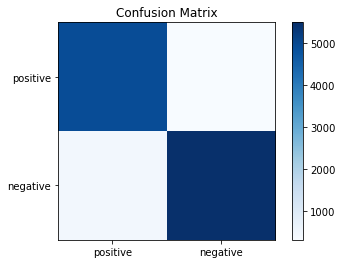

In [126]:
plot_confusion_matrix(cm2)

In [127]:
#Analysing fake words in real world
feature_names = cv.get_feature_names()

In [128]:
classifier.coef_#higher the negative value more the word fake is

array([[-12.21555752,  -9.21982525, -12.21555752, ..., -12.21555752,
         -9.50750732, -12.21555752]])

In [129]:
#top 20 words in real world
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[0:20]
#[0]th index because it must be in 1d array

[(-3.36604355605499, 'trump'),
 (-3.4510356120225865, 'video'),
 (-4.653915775952608, 'obama'),
 (-4.771893838425798, 'hillari'),
 (-4.92185980093995, 'watch'),
 (-5.34966644665795, 'presid'),
 (-5.434499895605208, 'clinton'),
 (-5.50625318128309, 'get'),
 (-5.547329273123985, 'break'),
 (-5.600831921337628, 'black'),
 (-5.608907335343173, 'tweet'),
 (-5.6616241175155775, 'support'),
 (-5.694936393982692, 'say'),
 (-5.699364445498424, 'white'),
 (-5.715770480885534, 'call'),
 (-5.718782531355526, 'make'),
 (-5.735512959614735, 'news'),
 (-5.735512959614735, 'new'),
 (-5.743211227040487, 'republican'),
 (-5.746307204745616, 'muslim')]